# Data Transform

In this notebook, we will ask you a series of questions to evaluate your findings from your EDA. Based on your response & justification, we will ask you to also apply a subsequent data transformation. 

If you state that you will not apply any data transformations for this step, you must **justify** as to why your dataset/machine-learning does not require the mentioned data preprocessing step.

The bonus step is completely optional, but if you provide a sufficient feature engineering step in this project we will add `1000` points to your Kahoot leaderboard score.

You will write out this transformed dataframe as a `.csv` file to your `data/` folder.

**Note**: Again, note that this dataset is quite large. If you find that some data operations take too long to complete on your machine, simply use the `sample()` method to transform a subset of your data.

In [28]:
import pandas as pd
import numpy as np

## Q1

Does your model contain any missing values or "non-predictive" columns? If so, which adjustments should you take to ensure that your model has good predictive capabilities? Apply your data transformations (if any) in the code-block below.

Answer: There are no missing values in the dataset, as confirmed by checking with df.isnull().sum(). However, we will remove some non-predictive columns, nameOrig, nameDest, and isFlaggedFraud, those data are not features we can use to predict the target variable (isFraud).

In [29]:
transactions = pd.read_csv("../data/bank_transactions.csv")
transactions.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [30]:
transactions.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,983.09,36730.24,35747.15,0.00,0.00,0
1,PAYMENT,55215.25,99414.00,44198.75,0.00,0.00,0
2,CASH_IN,220986.01,7773074.97,7994060.98,924031.48,703045.48,0
3,TRANSFER,2357394.75,0.00,0.00,4202580.45,6559975.19,0
4,CASH_OUT,67990.14,0.00,0.00,625317.04,693307.19,0
...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,114122.11,100516.04,0.00,0.00,0
999996,PAYMENT,9139.61,0.00,0.00,0.00,0.00,0
999997,CASH_OUT,153650.41,50677.00,0.00,0.00,380368.36,0
999998,CASH_OUT,163810.52,0.00,0.00,357850.15,521660.67,0


In [31]:
transactions.dropna(inplace=True)
transactions.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Q2

Do certain transaction types consistently differ in amount or fraud likelihood? If so, how might you transform the type column to make this pattern usable by a machine learning model? Apply your data transformations (if any) in the code-block below.

Answer: 

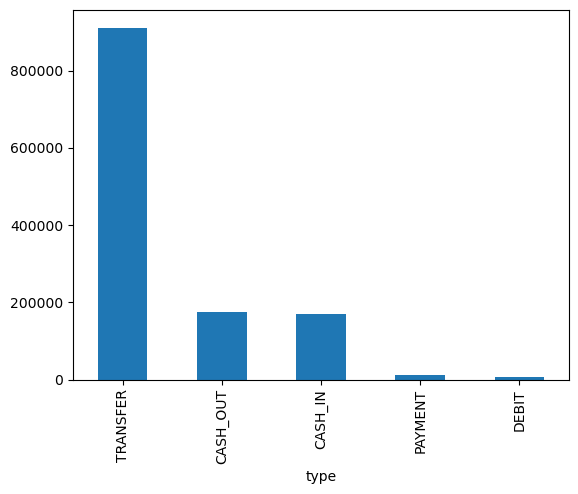

In [37]:
type_amount_mean = transactions.groupby('type')['amount'].mean().sort_values(ascending=False).plot.bar()

<Axes: xlabel='type'>

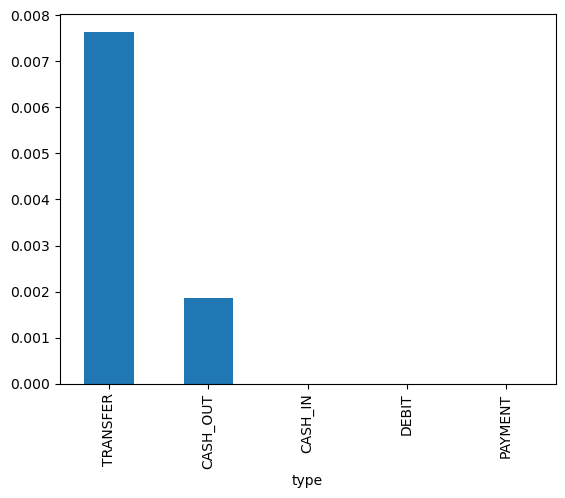

In [36]:
transactions.groupby('type')['isFraud'].mean().sort_values(ascending=False).plot.bar()

## Q3

After exploring your data, you may have noticed that fraudulent transactions are rare compared to non-fraudulent ones. What challenges might this pose when training a machine learning model? What strategies could you use to ensure your model learns meaningful patterns from the minority class? Apply your data transformations (if any) in the code-block below.

Answer here

## Bonus (optional)

Are there interaction effects between variables (e.g., fraud and high amount and transaction type) that aren't captured directly in the dataset? Would it be helpful to manually engineer any new features that reflect these interactions? Apply your data transformations (if any) in the code-block below.

Answer Here

In [33]:
# write out newly transformed dataset to your folder
...